In [1]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
## Handeling the imbelance data in customer churn prediction dataset

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
## loading the dataset
df=pd.read_csv('customer_churn.csv')
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2740,0415-MOSGF,Female,0,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Mailed check,44.40,44.4,Yes
5273,7673-BQGKU,Female,0,Yes,Yes,69,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.15,1337.5,No
736,6647-ZEDXT,Female,0,No,No,30,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,No,Credit card (automatic),110.45,3327.05,No
1123,0074-HDKDG,Male,0,Yes,Yes,25,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,Yes,Bank transfer (automatic),61.60,1611,No
4309,2582-FFFZR,Female,0,No,No,22,No,No phone service,DSL,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,50.60,1073.3,No


In [5]:
df.Churn.value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [6]:
df.Churn.value_counts(normalize=True)   

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

In [7]:
df.shape

(7043, 21)

In [8]:
## Droping the unwanted columns
## customerID column is not required for prediction
df.drop('customerID',axis='columns',inplace=True)

In [9]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [11]:
## Converting to numeric data type
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [12]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [13]:
df.iloc[488]['TotalCharges']

' '

In [14]:
## Removing the blank rows
df1=df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [15]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

In [16]:
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

<Axes: >

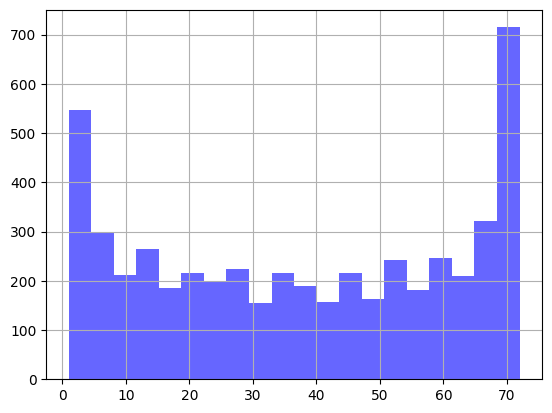

In [17]:
df1[df1.Churn=='No'].tenure.hist(bins=20,alpha=0.6,color='blue',label='Churn=No')

<Axes: >

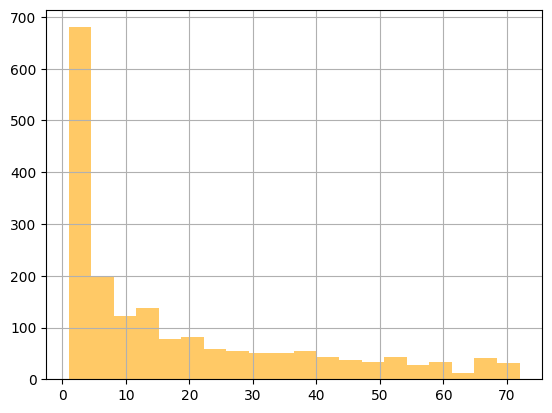

In [18]:
## Data Visualization
df1[df1.Churn=='Yes'].tenure.hist(bins=20,alpha=0.6,color='orange',label='Churn=Yes')

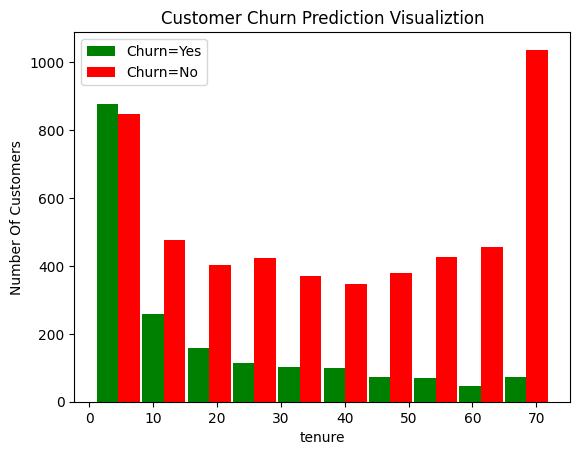

In [19]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

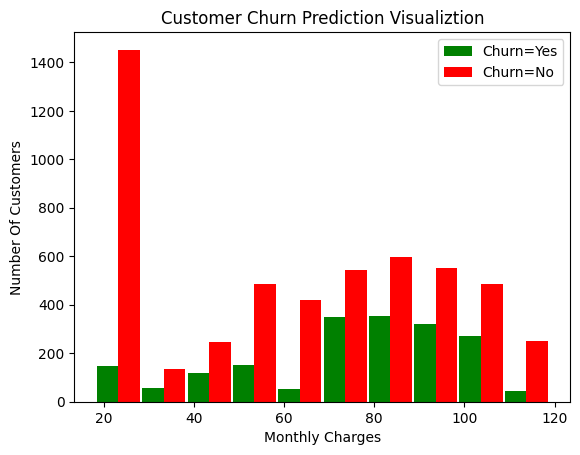

In [20]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [21]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [22]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [23]:
## Some of the columns have no internet service or no phone service, that can be replaced with a simple No

In [24]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [25]:
## Converting the categorical columns to numerical columns
## Replacing Yes with 1 and No with 0

yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

In [26]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [27]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [28]:
df1.gender.unique()

array([1, 0])

In [29]:
## One hot encoding for categorical columns
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])

In [30]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6517,1,0,1,1,6,1,0,0,0,0,...,True,False,False,True,False,False,False,False,True,False
3210,1,0,1,1,64,1,0,1,0,0,...,True,False,False,False,True,False,False,False,False,True
4106,1,1,1,0,24,1,1,0,0,0,...,False,True,False,True,False,False,False,False,True,False
461,1,0,1,0,24,1,0,0,1,0,...,True,False,False,True,False,False,True,False,False,False
3050,1,0,0,0,5,1,0,0,0,0,...,False,True,False,True,False,False,False,True,False,False


In [31]:
df2 = df2.astype(int)
df2.replace({True: 1, False: 0}, inplace=True)


In [32]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2027,1,0,1,0,24,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
5418,0,1,0,0,18,1,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
5484,0,0,1,1,69,1,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3471,1,0,0,0,35,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1


In [33]:
df2.dtypes

gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
MultipleLines                              int64
OnlineSecurity                             int64
OnlineBackup                               int64
DeviceProtection                           int64
TechSupport                                int64
StreamingTV                                int64
StreamingMovies                            int64
PaperlessBilling                           int64
MonthlyCharges                             int64
TotalCharges                               int64
Churn                                      int64
InternetService_DSL                        int64
InternetService_Fiber optic                int64
InternetService_No                         int64
Contract_Month-to-mo

In [34]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df2[cols_to_scale]=scaler.fit_transform(df2[cols_to_scale])

In [35]:
for cols in df2:
    print(f'{cols}: {df2[cols].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [36]:
## Train Test Split
x=df2.drop('Churn',axis='columns')
y=df2['Churn']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state = 5)

In [37]:
y_train.shape

(5625,)

In [38]:
y_train[:10]

5664    1
101     0
2621    0
392     0
1327    1
3607    0
2773    0
1936    0
5387    0
4331    0
Name: Churn, dtype: int64

In [39]:
x_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
3607,1,0,0,0,0.169014,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2773,0,0,1,0,0.323944,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1936,1,0,1,0,0.704225,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
5387,0,0,0,0,0.042254,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4331,0,0,0,0,0.985915,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0


In [40]:
len(x_train.columns)

26

In [41]:
## Building a model (ANN) in tensorflow/keras
# from tensorflow_addons import losses
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report    

2023-12-11 07:14:49.365164: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-11 07:14:49.397397: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-11 07:14:49.397434: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-11 07:14:49.398646: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-11 07:14:49.404758: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-11 07:14:49.405637: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [42]:
def ANN(x_train,y_train,x_test,y_test,loss,weights):
    model=keras.Sequential([
        keras.layers.Dense(26,input_shape=(26,),activation='relu'),
        keras.layers.Dense(15,activation='relu'),
        keras.layers.Dense(1,activation='sigmoid')
    ])
    model.compile(optimizer='adam',loss=loss,metrics=['accuracy'])
    if weights== -1:
        model.fit(x_train,y_train,epochs=100)
    else:
        model.fit(x_train,y_train,epochs=100,class_weight=weights)
    print(model.evaluate(x_test,y_test))
    y_pred=model.predict(x_test)
    y_pred=np.round(y_pred)
    print(classification_report(y_test,y_pred))
    return y_pred

In [43]:
y_pred=ANN(x_train,y_train,x_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
176/176 [==============================] - 1s 1ms/step - loss: 0.5813 - accuracy: 0.6716
Epoch 2/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4371 - accuracy: 0.7828
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4220 - accuracy: 0.8014
Epoch 4/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4166 - accuracy: 0.8025
Epoch 5/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4138 - accuracy: 0.8041
Epoch 6/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4120 - accuracy: 0.8050
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4108 - accuracy: 0.8046
Epoch 8/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4095 - accuracy: 0.8078
Epoch 9/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4071 - accuracy: 0.8082
Epoch 10/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4062 - accura

In [44]:
import pandas as pd
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report


,precision,recall,f1-score,support
0,0.806452,0.875876,0.839731,999.000000
1,0.614907,0.485294,0.542466,408.000000
accuracy,0.762615,0.762615,0.762615,0.762615
macro avg,0.710679,0.680585,0.691099,1407.000000
weighted avg,0.750908,0.762615,0.753531,1407.000000


In [45]:
## class Count
class_count_0, class_count_1 = df2['Churn'].value_counts()

## Separate class
class_0 = df2[df2['Churn'] == 0]
class_1 = df2[df2['Churn'] == 1]


In [46]:
## Class count
class_0_count, class_1_count = df2['Churn'].value_counts()
class_0_count,class_1_count 

(5163, 1869)

In [47]:
class_0.shape,class_1.shape

((5163, 27), (1869, 27))

#### Mitigating the Skewdness of Data

##### Method-1 Undersampling

In [48]:
## ubdersampling the 0-th class and concat the 1-th class
# .sample() is used to generate a sample of random rows and columns from the dataset.
df_class_0_under = class_0.sample(class_1_count)
df_under_test = pd.concat([df_class_0_under, class_1], axis=0)
print('Random under-sampling:')
print(df_under_test['Churn'].value_counts())

Random under-sampling:
Churn
0    1869
1    1869
Name: count, dtype: int64


In [49]:
x=df_under_test.drop('Churn',axis='columns')
y=df_under_test['Churn']
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state = 5)

In [50]:
## Number of classes in the traning dataset 
y_train.value_counts()

Churn
1    1498
0    1492
Name: count, dtype: int64

In [51]:
y_pred=ANN(x_train,y_train,x_test,y_test,'binary_crossentropy',-1)

Epoch 1/100


94/94 [==============================] - 1s 986us/step - loss: 0.6041 - accuracy: 0.6783
Epoch 2/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5122 - accuracy: 0.7545
Epoch 3/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4977 - accuracy: 0.7629
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4906 - accuracy: 0.7669
Epoch 5/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4860 - accuracy: 0.7622
Epoch 6/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4840 - accuracy: 0.7662
Epoch 7/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4785 - accuracy: 0.7719
Epoch 8/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4776 - accuracy: 0.7649
Epoch 9/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4748 - accuracy: 0.7709
Epoch 10/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4724 - accuracy: 0.7756
Epoch 11/100
94/94 

In [52]:
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report


,precision,recall,f1-score,support
0,0.745856,0.716180,0.730717,377.000000
1,0.722798,0.752022,0.737120,371.000000
accuracy,0.733957,0.733957,0.733957,0.733957
macro avg,0.734327,0.734101,0.733919,748.000000
weighted avg,0.734420,0.733957,0.733893,748.000000


In [53]:
## Method 2: Oversampling the minority class
df_class_1_over = class_1.sample(class_0_count, replace=True)
df_over_test = pd.concat([df_class_1_over, class_0], axis=0)
print('Random over-sampling:')
print(df_over_test['Churn'].value_counts())

Random over-sampling:
Churn
1    5163
0    5163
Name: count, dtype: int64


In [54]:
x=df_over_test.drop('Churn',axis='columns') 
y=df_over_test['Churn']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state = 5)

In [55]:
## Number of classes in the traning dataset
y_train.value_counts()

Churn
0    4134
1    4126
Name: count, dtype: int64

In [56]:
loss = tf.keras.losses.BinaryCrossentropy()
wheights=-1
y_pred=ANN(x_train,y_train,x_test,y_test,loss,wheights)

Epoch 1/100


259/259 [==============================] - 1s 1ms/step - loss: 0.5385 - accuracy: 0.7350
Epoch 2/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4851 - accuracy: 0.7666
Epoch 3/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4772 - accuracy: 0.7674
Epoch 4/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4741 - accuracy: 0.7718
Epoch 5/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4714 - accuracy: 0.7717
Epoch 6/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4691 - accuracy: 0.7754
Epoch 7/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4674 - accuracy: 0.7792
Epoch 8/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4656 - accuracy: 0.7787
Epoch 9/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4622 - accuracy: 0.7803
Epoch 10/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4612 - accuracy: 0.7832
E

In [57]:
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report


,precision,recall,f1-score,support
0,0.810840,0.741497,0.774619,1029.000000
1,0.763556,0.828351,0.794635,1037.000000
accuracy,0.785092,0.785092,0.785092,0.785092
macro avg,0.787198,0.784924,0.784627,2066.000000
weighted avg,0.787106,0.785092,0.784666,2066.000000


In [58]:
## Method 3: SMOTE

In [59]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [60]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')
x_sm,y_sm=smote.fit_resample(x,y)
y_sm.value_counts()

Churn
1    5163
0    5163
Name: count, dtype: int64

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm,test_size=0.2,random_state = 5)    

In [62]:
y_train.value_counts()

Churn
0    4134
1    4126
Name: count, dtype: int64

In [63]:
y_pred=ANN(x_train,y_train,x_test,y_test,loss,wheights) 

Epoch 1/100


259/259 [==============================] - 1s 1ms/step - loss: 0.5642 - accuracy: 0.7074
Epoch 2/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4878 - accuracy: 0.7623
Epoch 3/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4788 - accuracy: 0.7659
Epoch 4/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4737 - accuracy: 0.7672
Epoch 5/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4699 - accuracy: 0.7741
Epoch 6/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4682 - accuracy: 0.7753
Epoch 7/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4653 - accuracy: 0.7743
Epoch 8/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4625 - accuracy: 0.7775
Epoch 9/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4608 - accuracy: 0.7793
Epoch 10/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4582 - accuracy: 0.7788
E

In [64]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report


,precision,recall,f1-score,support
0,0.821948,0.713314,0.763788,1029.000000
1,0.748508,0.846673,0.794570,1037.000000
accuracy,0.780252,0.780252,0.780252,0.780252
macro avg,0.785228,0.779993,0.779179,2066.000000
weighted avg,0.785086,0.780252,0.779239,2066.000000


In [65]:
## Method 4: Use of Ensemble with undersampling

In [66]:
df2['Churn'].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [67]:
## Regaining the original dataset i.e. orginal features and lables
x=df2.drop('Churn',axis='columns')
y=df2['Churn']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state = 5) 
y_train.value_counts()

Churn
0    4164
1    1461
Name: count, dtype: int64

In [68]:
df3=x_train.copy()
df3['Churn']=y_train   

In [69]:
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
5664,1,1,0,0,0.126761,1,0,0,0,1,...,1,0,1,0,0,0,1,0,0,1
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,0,0,0,0,1,0,1,0,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,1,0,0,1,0,1,0,0,0,1


In [70]:
df3_class_0 = df3[df3['Churn'] == 0]
df3_class_1 = df3[df3['Churn'] == 1]


def get_train_batch(df_majority,df_minority,start,end):
    df_train=pd.concat([df_majority[start:end],df_minority],axis=0)
    x_train=df_train.drop('Churn',axis='columns')
    y_train=df_train.Churn
    return x_train,y_train

In [71]:
x_train,y_train=get_train_batch(df3_class_0,df3_class_1,0,1495)
y_pred1=ANN(x_train,y_train,x_test,y_test,loss,wheights)

Epoch 1/100


93/93 [==============================] - 1s 2ms/step - loss: 0.6340 - accuracy: 0.6776
Epoch 2/100
93/93 [==============================] - 0s 1ms/step - loss: 0.5318 - accuracy: 0.7544
Epoch 3/100
93/93 [==============================] - 0s 1ms/step - loss: 0.5076 - accuracy: 0.7551
Epoch 4/100
93/93 [==============================] - 0s 1ms/step - loss: 0.4995 - accuracy: 0.7598
Epoch 5/100
93/93 [==============================] - 0s 1ms/step - loss: 0.4956 - accuracy: 0.7612
Epoch 6/100
93/93 [==============================] - 0s 1ms/step - loss: 0.4917 - accuracy: 0.7635
Epoch 7/100
93/93 [==============================] - 0s 1ms/step - loss: 0.4889 - accuracy: 0.7612
Epoch 8/100
93/93 [==============================] - 0s 1ms/step - loss: 0.4873 - accuracy: 0.7700
Epoch 9/100
93/93 [==============================] - 0s 1ms/step - loss: 0.4879 - accuracy: 0.7622
Epoch 10/100
93/93 [==============================] - 0s 1ms/step - loss: 0.4831 - accuracy: 0.7673
Epoch 11/100
93/93 [=

In [72]:
y_pred1.shape

(1407, 1)

In [73]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred1, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report


,precision,recall,f1-score,support
0,0.883375,0.712713,0.788920,999.000000
1,0.522463,0.769608,0.622398,408.000000
accuracy,0.729211,0.729211,0.729211,0.729211
macro avg,0.702919,0.741160,0.705659,1407.000000
weighted avg,0.778718,0.729211,0.740632,1407.000000


In [74]:
x_train,y_train=get_train_batch(df3_class_0,df3_class_1,1495,2990)
y_pred2=ANN(x_train,y_train,x_test,y_test,loss,wheights)

Epoch 1/100
93/93 [==============================] - 1s 1ms/step - loss: 0.7176 - accuracy: 0.5396
Epoch 2/100
93/93 [==============================] - 0s 1ms/step - loss: 0.5611 - accuracy: 0.7490
Epoch 3/100
93/93 [==============================] - 0s 1ms/step - loss: 0.4983 - accuracy: 0.7598
Epoch 4/100
93/93 [==============================] - 0s 1ms/step - loss: 0.4865 - accuracy: 0.7662
Epoch 5/100
93/93 [==============================] - 0s 1ms/step - loss: 0.4822 - accuracy: 0.7662
Epoch 6/100
93/93 [==============================] - 0s 1ms/step - loss: 0.4790 - accuracy: 0.7649
Epoch 7/100
93/93 [==============================] - 0s 2ms/step - loss: 0.4755 - accuracy: 0.7662
Epoch 8/100
93/93 [==============================] - 0s 1ms/step - loss: 0.4730 - accuracy: 0.7717
Epoch 9/100
93/93 [==============================] - 0s 1ms/step - loss: 0.4697 - accuracy: 0.7791
Epoch 10/100
93/93 [==============================] - 0s 1ms/step - loss: 0.4701 - accuracy: 0.7784
Epoch 11/

In [75]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred2, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report


,precision,recall,f1-score,support
0,0.881995,0.725726,0.796266,999.000000
1,0.531624,0.762255,0.626385,408.000000
accuracy,0.736318,0.736318,0.736318,0.736318
macro avg,0.706810,0.743990,0.711325,1407.000000
weighted avg,0.780395,0.736318,0.747004,1407.000000


In [78]:
x_train,y_train=get_train_batch(df3_class_0,df3_class_1,2990,4138)
y_pred3=ANN(x_train,y_train,x_test,y_test,loss,wheights)

Epoch 1/100


82/82 [==============================] - 1s 1ms/step - loss: 0.6016 - accuracy: 0.7122
Epoch 2/100
82/82 [==============================] - 0s 1ms/step - loss: 0.5107 - accuracy: 0.7673
Epoch 3/100
82/82 [==============================] - 0s 1ms/step - loss: 0.4904 - accuracy: 0.7624
Epoch 4/100
82/82 [==============================] - 0s 1ms/step - loss: 0.4837 - accuracy: 0.7658
Epoch 5/100
82/82 [==============================] - 0s 1ms/step - loss: 0.4791 - accuracy: 0.7677
Epoch 6/100
82/82 [==============================] - 0s 1ms/step - loss: 0.4760 - accuracy: 0.7681
Epoch 7/100
82/82 [==============================] - 0s 1ms/step - loss: 0.4734 - accuracy: 0.7704
Epoch 8/100
82/82 [==============================] - 0s 1ms/step - loss: 0.4723 - accuracy: 0.7712
Epoch 9/100
82/82 [==============================] - 0s 1ms/step - loss: 0.4690 - accuracy: 0.7754
Epoch 10/100
82/82 [==============================] - 0s 1ms/step - loss: 0.4672 - accuracy: 0.7765
Epoch 11/100
82/82 [=

In [79]:
report = classification_report(y_test, y_pred3, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report


,precision,recall,f1-score,support
0,0.903181,0.653654,0.758420,999.000000
1,0.494152,0.828431,0.619048,408.000000
accuracy,0.704335,0.704335,0.704335,0.704335
macro avg,0.698667,0.741043,0.688734,1407.000000
weighted avg,0.784571,0.704335,0.718005,1407.000000


In [80]:
len(y_pred1)

1407

In [81]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i]+y_pred2[i]+y_pred3[i]
    if n_ones>1:
        y_pred_final[i]=1
    else:
        y_pred_final[i]=0

In [82]:
classification_report=classification_report(y_test, y_pred_final, output_dict=True)
print(classification_report)

{'0': {'precision': 0.8958068614993647, 'recall': 0.7057057057057057, 'f1-score': 0.7894736842105262, 'support': 999.0}, '1': {'precision': 0.5258064516129032, 'recall': 0.7990196078431373, 'f1-score': 0.6342412451361867, 'support': 408.0}, 'accuracy': 0.7327647476901208, 'macro avg': {'precision': 0.710806656556134, 'recall': 0.7523626567744215, 'f1-score': 0.7118574646733564, 'support': 1407.0}, 'weighted avg': {'precision': 0.78851463176683, 'recall': 0.7327647476901208, 'f1-score': 0.744459586739076, 'support': 1407.0}}


In [83]:
import pandas as pd

classification_report = {
    '0': {'precision': 0.85, 'recall': 0.92, 'f1-score': 0.88, 'support': 500},
    '1': {'precision': 0.75, 'recall': 0.62, 'f1-score': 0.68, 'support': 300},
    'accuracy': 0.82,
    'macro avg': {'precision': 0.80, 'recall': 0.77, 'f1-score': 0.78, 'support': 800},
    'weighted avg': {'precision': 0.81, 'recall': 0.82, 'f1-score': 0.81, 'support': 800}
}

df_report = pd.DataFrame(classification_report).transpose()
print(df_report)


              precision  recall  f1-score  support
0                  0.85    0.92      0.88   500.00
1                  0.75    0.62      0.68   300.00
accuracy           0.82    0.82      0.82     0.82
macro avg          0.80    0.77      0.78   800.00
weighted avg       0.81    0.82      0.81   800.00
